In [1]:
import pandas as pd 
import numpy as np
import scipy.signal as signal
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
cols = ['ts', 'gx', 'gy', 'gz', 'ax', 'ay', 'az']
acc_cols = ['ax', 'ay', 'az']
gyro_cols = ['gx', 'gy', 'gz']

dataset = 'data-test-snaponly'
df = pd.read_csv(f'./data/{dataset}.csv', names=cols)

df['ms'] = pd.to_numeric(df['ts'] / 1000).astype(np.int64)
df['s'] = pd.to_numeric(df['ts'] / (1000*1000)).astype(np.int64)
df['wnd'] = pd.to_numeric(df['ms'] / 250).astype(np.int64)

df['acc'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)
# df['mag'] =  df.apply(lambda x: np.linalg.norm(x[['gx', 'gy', 'gz']]), axis=1)


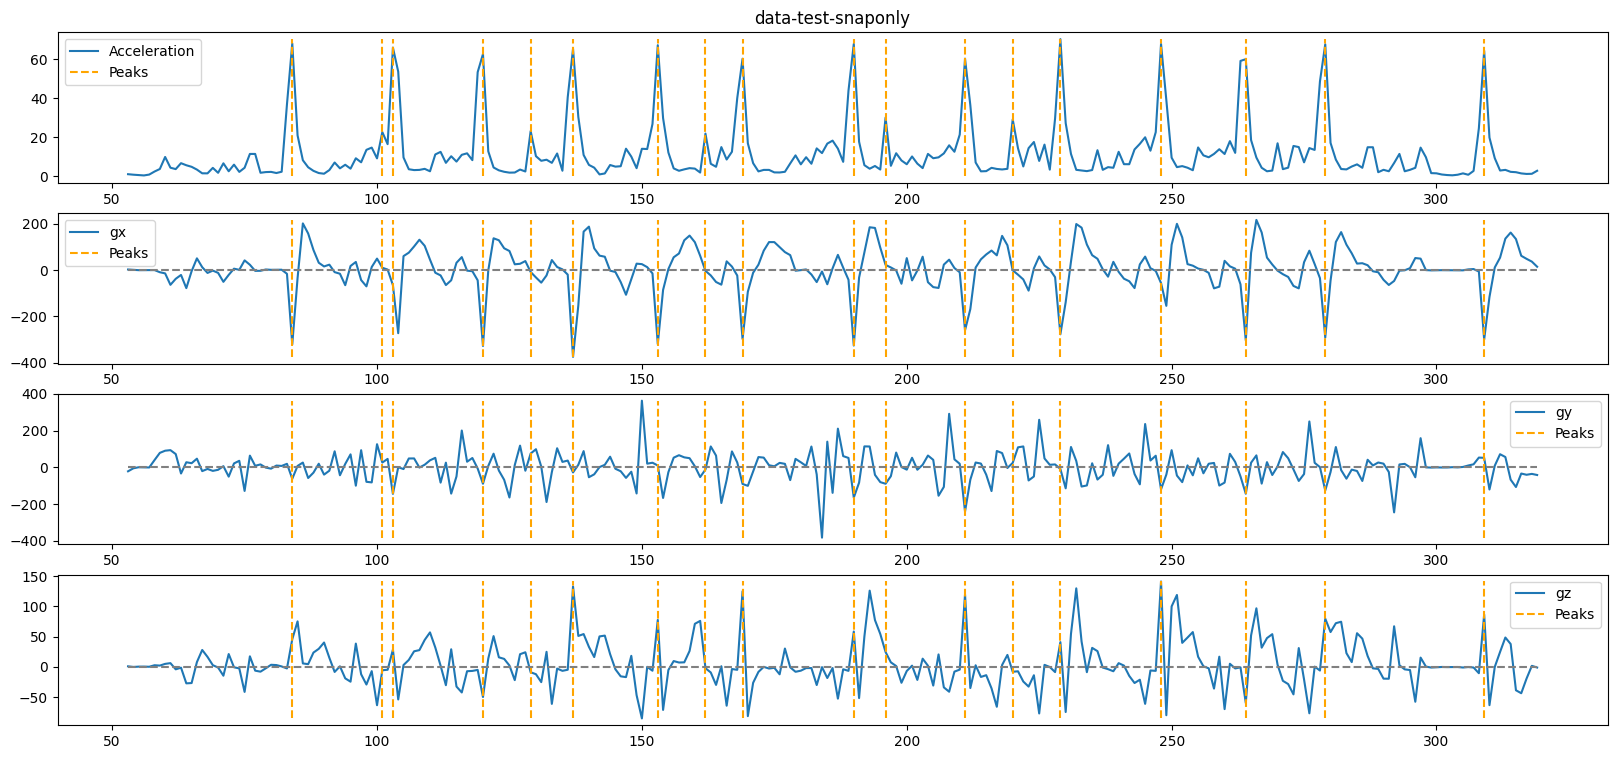

In [8]:
# for c in ['gx', 'gy', 'gz']:
#     df[f'{c}pc'] = (df[c].pct_change()).replace([np.inf], 100).replace([-np.inf], 0)


pds = df.groupby('wnd').max()
peaks, _ = signal.find_peaks(pds['acc'], height=20, distance=1)

rds = df.groupby('wnd').median()
# cols = ['ax', 'ay', 'az', 'mag', 'gx', 'gy', 'gz']
# cols = ['gxpc', 'gypc', 'gzpc']
cols = ['gx', 'gy', 'gz']
# cols = ['gx', 'gxpc', 'gy', 'gypc', 'gz', 'gzpc']

fig, axs = plt.subplots(len(cols)+1, 1, figsize=(20, 3*len(cols)))

start = pds.index.min()
end = pds.index.max()

axs[0].set_title(dataset)
axs[0].plot(pds['acc'], label='Acceleration')
#axs[0].plot(pds['acc'].iloc[peaks], "x", label='Peaks')
axs[0].vlines(x=pds.index[peaks], ymin=0, ymax=pds['acc'].max(), linestyle='--', label='Peaks', color='orange')
axs[0].legend()

i = 1
for col in cols:
    axs[i].plot(rds[col], label=f'{col}')
    axs[i].vlines(x=rds.index[peaks], ymin=rds[col].min(), ymax=rds[col].max(), linestyle='--', label='Peaks', color='orange')
    axs[i].plot([start, end], [0, 0], linestyle='--', color='gray')
    axs[i].legend()
    i += 1
plt.show()

In [264]:
i = 1
for p in peaks:
    mps = 2.2369362920544
    a = pds['acc'].iloc[p]
    t = (pds['ms'].iloc[p] - pds['ms'].iloc[p-1])/1000
    v = np.sqrt((0.385 * (a * t)**2)/0.160)
    s = v * mps 
    print(f'{i}: Acceleration: {a:.2f} m/s², Velocity: {v:.2f} Time: {t:.2f} s: {s:.2f} mph')    
    i+=1 

1: Acceleration: 67.95 m/s², Velocity: 26.45 Time: 0.25 s: 59.18 mph
2: Acceleration: 22.54 m/s², Velocity: 8.71 Time: 0.25 s: 19.48 mph
3: Acceleration: 65.80 m/s², Velocity: 25.21 Time: 0.25 s: 56.40 mph
4: Acceleration: 62.49 m/s², Velocity: 24.53 Time: 0.25 s: 54.86 mph
5: Acceleration: 23.04 m/s², Velocity: 9.01 Time: 0.25 s: 20.15 mph
6: Acceleration: 65.19 m/s², Velocity: 24.57 Time: 0.24 s: 54.97 mph
7: Acceleration: 67.05 m/s², Velocity: 26.11 Time: 0.25 s: 58.40 mph
8: Acceleration: 21.78 m/s², Velocity: 8.51 Time: 0.25 s: 19.04 mph
9: Acceleration: 60.09 m/s², Velocity: 23.40 Time: 0.25 s: 52.34 mph
10: Acceleration: 67.70 m/s², Velocity: 26.57 Time: 0.25 s: 59.43 mph
11: Acceleration: 29.98 m/s², Velocity: 11.49 Time: 0.25 s: 25.69 mph
12: Acceleration: 60.13 m/s², Velocity: 23.32 Time: 0.25 s: 52.16 mph
13: Acceleration: 29.02 m/s², Velocity: 11.12 Time: 0.25 s: 24.88 mph
14: Acceleration: 70.16 m/s², Velocity: 27.10 Time: 0.25 s: 60.62 mph
15: Acceleration: 67.65 m/s², Ve